In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

# Basics
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder

# Statistical Test
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind

# Train Test Split
from sklearn.model_selection import train_test_split

# Imbalanced Dataset
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Standard Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score

# Outlier Treatment
from sklearn.impute import KNNImputer


Using TensorFlow backend.


## Problem Statement

Increase in the adoption and penetration of Internet has turned the online marketplace into an important distribution channel where consumers and businesses interact with each other. But the fact that the conversion trates have not increased at the same rate leads to the needs for solutions

The Gozalan Group, which is a leading distribution company in Turkey approached us to analyse and predict online shoppers intention, so that they can provide customized promotions to online shoppers

We will analyze the different features like time duration in pages, boune/exit rates, page value etc to predict whether making transaction or not

## Dataset

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
print('Dataset has {} rows and {} features'.format(data.shape[0],data.shape[1]))

Dataset has 12330 rows and 18 features


## Features

1.	Administrative:  Number of pages visited by the visitor about account management
2.	Administrative duration: Total amount of time (in seconds) spent by the visitor on account management related pages
3.	Informational: Number of pages visited by the visitor about Web site, communication and address information of the shopping site
4.	Informational duration: Total amount of time (in seconds) spent by the visitor on informational pages 
5.	Product related: Number of pages visited by visitor about product related pages 
6.	Product related duration: Total amount of time (in seconds) spent by the visitor on product related pages


The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

7.	Bounce rate: Average bounce rate value of the pages visited by the visitor
8.	Exit rate Average exit rate value of the pages visited by the visitor
9.	Page value Average page value of the pages visited by the visitor


The metrics measured by "Google Analytics" for each page in the e-commerce site.

10.	Special Day

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

Revenue is our Output Variable. It depends on all the input variables

As per our assumptions, the label can mainly depend upon bounce rate, exit rate, special day, page value and duration of product related pages

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

The dataset contains 10 numerical and 8 categorical attributes

In [6]:
num=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
     'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

In [7]:
cat=['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType','Weekend', 'Revenue']

In [8]:
data[num].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [9]:
for i in cat:
    print('Percentage of %s:'%i)
    print((data[i].value_counts()/data.shape[0])*100)
    print()

Percentage of Month:
May     27.283049
Nov     24.314680
Mar     15.466342
Dec     14.006488
Oct      4.452555
Sep      3.633414
Aug      3.511760
Jul      3.503650
June     2.335766
Feb      1.492295
Name: Month, dtype: float64

Percentage of OperatingSystems:
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: OperatingSystems, dtype: float64

Percentage of Browser:
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: Browser, dtype: float64

Percentage of Region:
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: Region, dtype: float64

Percentage of TrafficType:
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6     

The dataset is an imbalanced dataset, with 84.5% making no transaction while 15.4% making transaction

In [10]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

There is no missing values

## Uni-variate Analysis-Categorical Variables

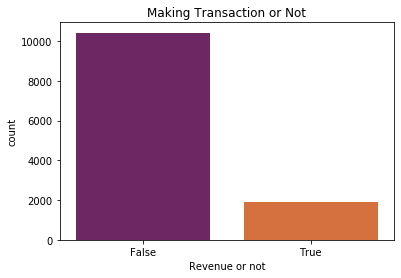

In [11]:
#Distribution of customers on Revenue
sns.countplot(data['Revenue'],palette='inferno')
plt.title('Making Transaction or Not')
plt.xlabel('Revenue or not')
plt.ylabel('count')
plt.show()

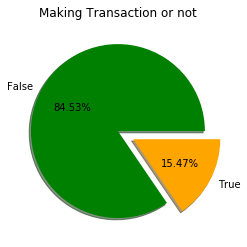

In [12]:
# Distribution of customers on Revenue
size=data['Revenue'].value_counts().values
labels=data['Revenue'].value_counts().index
colors = ['green', 'orange']
explode = [0, 0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.title('Making Transaction or not')
plt.show()

As stated above, dataset is an imbalanced one.Only 15.47% are making transaction

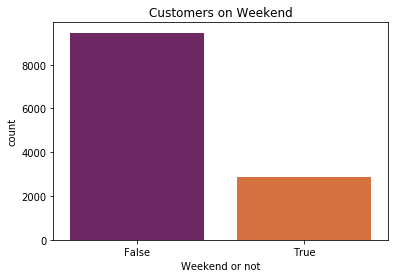

In [13]:
#Distribution of customers on Weekends
sns.countplot(data['Weekend'],palette='inferno')
plt.title('Customers on Weekend')
plt.xlabel('Weekend or not')
plt.ylabel('count')
plt.show()

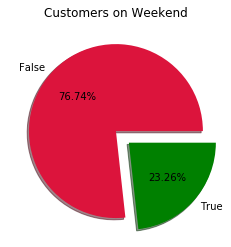

In [14]:
# Distribution of customers on Weekend
size=data['Weekend'].value_counts().values
labels=data['Weekend'].value_counts().index
colors = ['crimson', 'green']
explode = [0, 0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.title('Customers on Weekend')
plt.show()

Usually weekends have higher customers. But here in our dataset, almost 3/4th of the customers are visiting website on week days

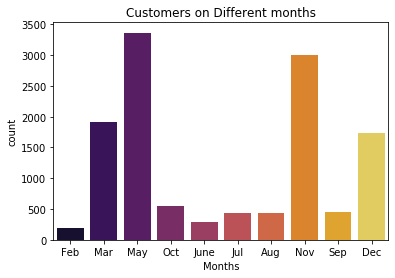

In [15]:
#Distribution of customers on Months
sns.countplot(data['Month'],palette='inferno')
plt.title('Customers on Different months')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

10 months are considered here, (exception January and April). In this May is the month, where the website is more commonly used.November,March and December are also considerable
One of the top Turkish Traditional Festival (Ahirkapi Hidirellez Festival) is happening in May. Also national youth and sports day is celebrated in May.
The main religious festival of Turkey, Ramadan is also in or around May

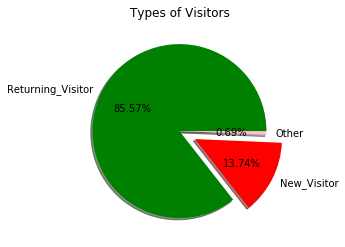

In [16]:
# Distribution of Visitors
size=data['VisitorType'].value_counts().values
labels=data['VisitorType'].value_counts().index
colors = ['green', 'red', 'pink']
explode = [0, 0.2, 0]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Types of Visitors')
plt.show()

The website is not having much new customers. Only 13.74% are new customers, while 85% are old customers.
So they can give some promotions to attract new customers

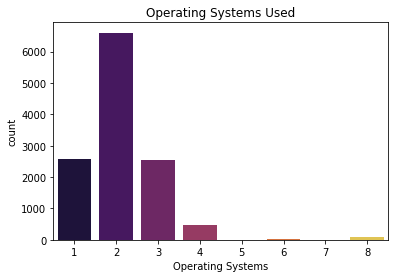

In [17]:
#Distribution of customers based on Operating Systems
sns.countplot(data['OperatingSystems'],palette='inferno')
plt.title('Operating Systems Used')
plt.xlabel('Operating Systems')
plt.ylabel('count')
plt.show()

Operating System 2 is commonly used

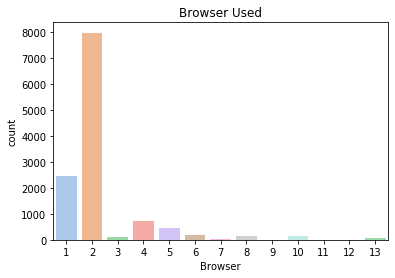

In [18]:
#Distribution of customers based on Browser
sns.countplot(data['Browser'],palette='pastel')
plt.title('Browser Used')
plt.xlabel('Browser')
plt.ylabel('count')
plt.show()

The common browser used is 2

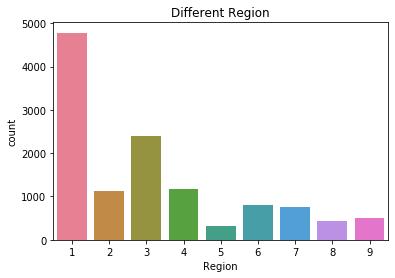

In [19]:
#Distribution of customers based on Region
sns.countplot(data['Region'],palette='husl')
plt.title('Different Region')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

The website is common among region 1 customers. Should give promotions in other regions to improve sales

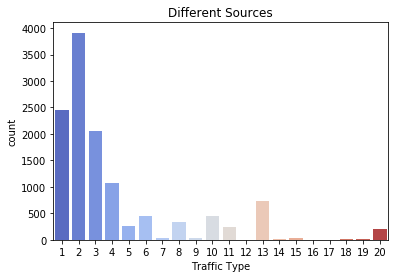

In [20]:
#Distribution of customers based on Traffic Type
sns.countplot(data['TrafficType'],palette='coolwarm')
plt.title('Different Sources')
plt.xlabel('Traffic Type')
plt.ylabel('count')
plt.show()

Traffic Source 2 is the best advertising source for the website. Should consider other sources and decide whether it is needed or not 

## Univariate Analysis-Numerical

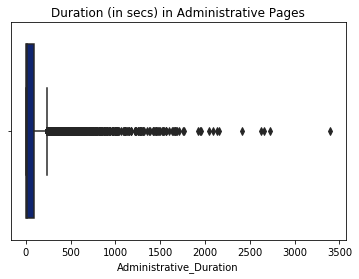

In [21]:
sns.boxplot(data['Administrative_Duration'],palette='dark')
plt.title('Duration (in secs) in Administrative Pages')
plt.show()

In [22]:
# q1=data['Administrative_Duration'].quantile(0.25)
# q3=data['Administrative_Duration'].quantile(0.75)
# iqr=q3-q1
# high=q3+(1.5*iqr)
# data.drop(data[data['Administrative_Duration']>high].index,inplace=True)

In [23]:
# sns.boxplot(data['Administrative_Duration'],palette='dark')
# plt.title('Duration (in secs) in Administrative Pages')
# plt.show()

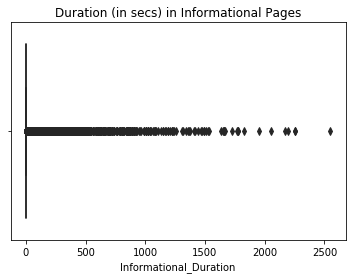

In [24]:
sns.boxplot(data['Informational_Duration'],palette='dark')
plt.title('Duration (in secs) in Informational Pages')
plt.show()

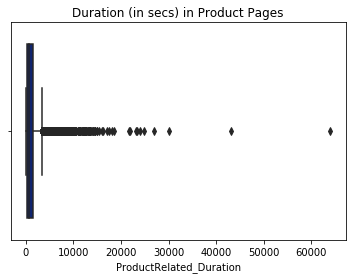

In [25]:
sns.boxplot(data['ProductRelated_Duration'],palette='dark')
plt.title('Duration (in secs) in Product Pages')
plt.show()

Large number of outliers present in Administrative Duration,Informational Duration and Product Related Duration. All the above features are heavily right skewed

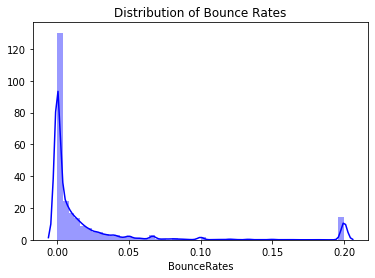

In [26]:
sns.distplot(data['BounceRates'],color='blue')
plt.title('Distribution of Bounce Rates')
plt.show()

Bounce Rate is also exhibitting right skeweness. Low bounce rates is a good parameter when considering a website

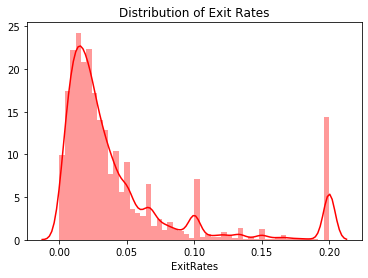

In [27]:
sns.distplot(data['ExitRates'],color='red')
plt.title('Distribution of Exit Rates')
plt.show()

The website is showing somewhat high exit rate compared to bounce rates. So proper promotions can avoid this

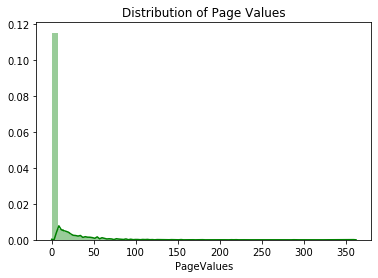

In [28]:
sns.distplot(data['PageValues'],color='green')
plt.title('Distribution of Page Values')
plt.show()

The page value is not so high, as most of the customers are not making transactions

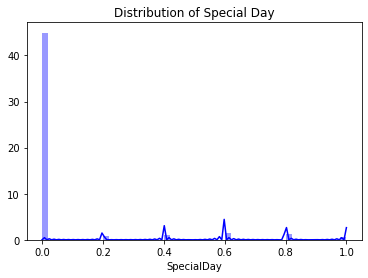

In [29]:
sns.distplot(data['SpecialDay'],color='blue')
plt.title('Distribution of Special Day')
plt.show()

Only some people are using website during festival seasons

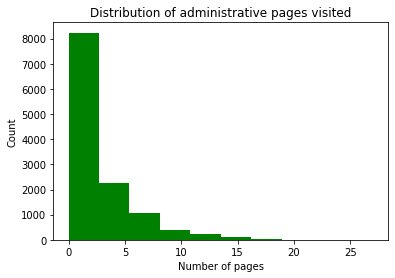

In [30]:
plt.hist(data['Administrative'],color='green')
plt.xlabel('Number of pages')
plt.ylabel('Count')
plt.title('Distribution of administrative pages visited')
plt.show()

There are people who are visiting account pages more than 10 times

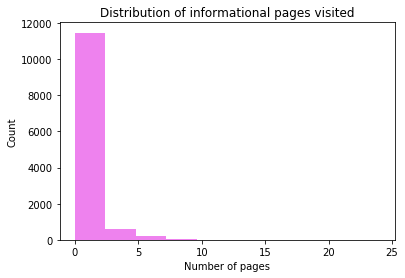

In [31]:
plt.hist(data['Informational'],color='violet')
plt.xlabel('Number of pages')
plt.ylabel('Count')
plt.title('Distribution of informational pages visited')
plt.show()

The informational pages visit is around 0 to 5

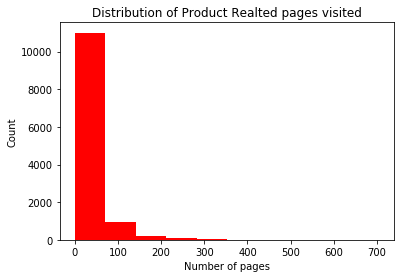

In [32]:
plt.hist(data['ProductRelated'],color='red')
plt.xlabel('Number of pages')
plt.ylabel('Count')
plt.title('Distribution of Product Realted pages visited')
plt.show()

## Bi-variate Analysis-Cat vs Cat

In [33]:
data['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [34]:
ct=pd.crosstab(data['Weekend'],data['Revenue'])
print(ct)

Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499


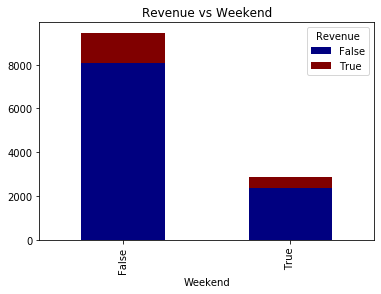

In [35]:
ct.plot(kind='bar',stacked=True,colormap='jet')
plt.title('Revenue vs Weekend')
plt.show()

In [36]:
print('Only {}% making transactions during weekends'.format((499/2868)*100))
print('{}% making transactions during week days'.format((1409/9462)*100))

Only 17.398884239888424% making transactions during weekends
14.89114352145424% making transactions during week days


As expected, more transactions are happening in weekends compared to weekdays. But qualitatively less transactions

In [37]:
data['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [38]:
ct=pd.crosstab(data['VisitorType'],data['Revenue'])
print(ct)

Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470


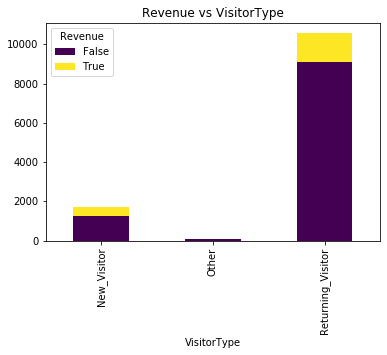

In [39]:
ct.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Revenue vs VisitorType')
plt.show()

In [40]:
print('{}% of new visitors are making transactions'.format((422/1694)*100))
print('{}% of returning visitors are making transactions'.format((1470/10551)*100))

24.911452184179456% of new visitors are making transactions
13.93232868922377% of returning visitors are making transactions


Only 13.9% of customers are visiting website and making transactions again. Therefore it should be studied to find out the reason behind that. 25% of new customers are making transactions, so should new customers also

In [41]:
data['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [42]:
ct=pd.crosstab(data['TrafficType'],data['Revenue'])
print(ct)

Revenue      False  True 
TrafficType              
1             2189    262
2             3066    847
3             1872    180
4              904    165
5              204     56
6              391     53
7               28     12
8              248     95
9               38      4
10             360     90
11             200     47
12               1      0
13             695     43
14              11      2
15              38      0
16               2      1
17               1      0
18              10      0
19              16      1
20             148     50


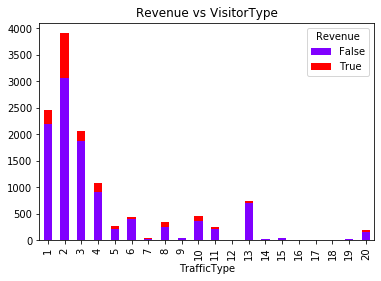

In [43]:
ct.plot(kind='bar',stacked=True,colormap='rainbow')
plt.title('Revenue vs VisitorType')
plt.show()

In [44]:
print('{}% of visitors from source 2 are making transactions'.format((847/3913)*100))

21.645796064400717% of visitors from source 2 are making transactions


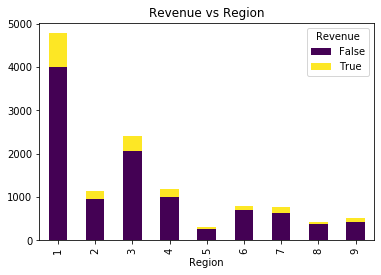

In [45]:
ct=pd.crosstab(data['Region'],data['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Revenue vs Region')
plt.show()

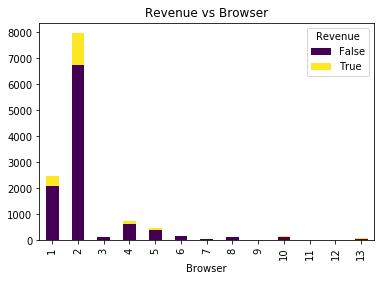

In [46]:
ct=pd.crosstab(data['Browser'],data['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Revenue vs Browser')
plt.show()

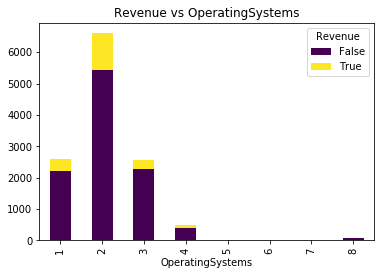

In [47]:
ct=pd.crosstab(data['OperatingSystems'],data['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Revenue vs OperatingSystems')
plt.show()

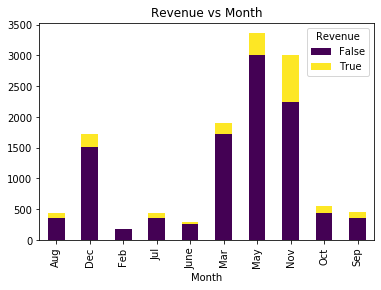

In [48]:
ct=pd.crosstab(data['Month'],data['Revenue'])
ct.plot(kind='bar',stacked=True,colormap='viridis')
plt.title('Revenue vs Month')
plt.show()

## Bi-variate Analysis-Cat vs Qual

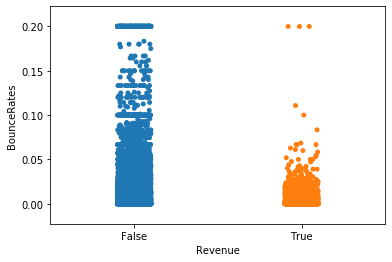

In [49]:
sns.stripplot(data['Revenue'],data['BounceRates'])
plt.show()

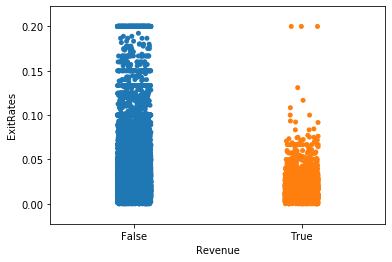

In [50]:
sns.stripplot(data['Revenue'],data['ExitRates'])
plt.show()

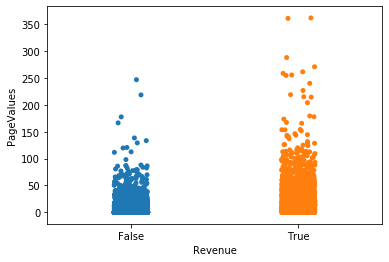

In [51]:
sns.stripplot(data['Revenue'],data['PageValues'])
plt.show()

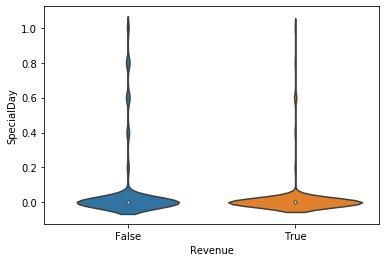

In [52]:
sns.violinplot(data['Revenue'],data['SpecialDay'])
plt.show()

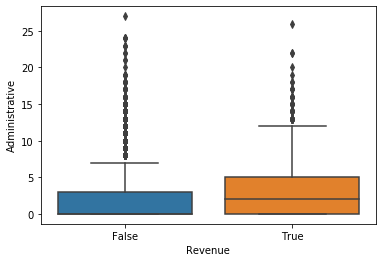

In [53]:
sns.boxplot(data['Revenue'],data['Administrative'])
plt.show()

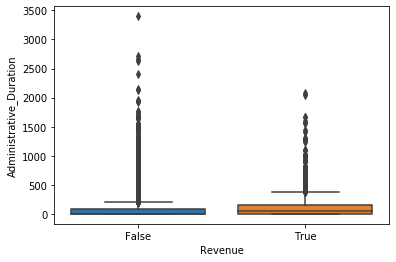

In [54]:
sns.boxplot(data['Revenue'],data['Administrative_Duration'])
plt.show()

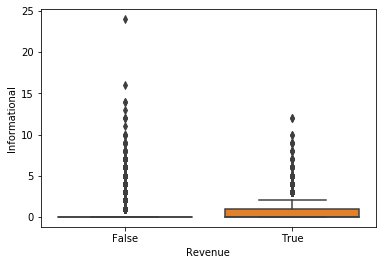

In [55]:
sns.boxplot(data['Revenue'],data['Informational'])
plt.show()

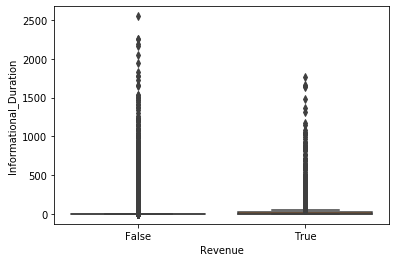

In [56]:
sns.boxplot(data['Revenue'],data['Informational_Duration'])
plt.show()

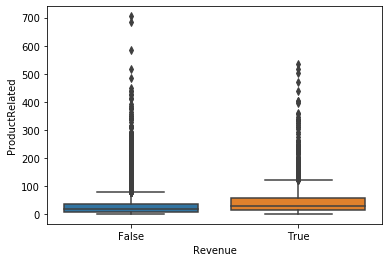

In [57]:
sns.boxplot(data['Revenue'],data['ProductRelated'])
plt.show()

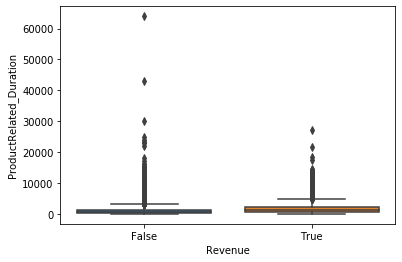

In [58]:
sns.boxplot(data['Revenue'],data['ProductRelated_Duration'])
plt.show()

## Analysis of data making transactions

In [59]:
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [60]:
new_data=data.groupby('Revenue')
new_data_rev=new_data.get_group(1)
new_data_no_rev=new_data.get_group(0)

In [61]:
new_data_rev.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.0,27,798.333333,0.000000,0.012644,22.916036,0.8,Feb,2,2,3,1,Returning_Visitor,False,1
76,10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,Feb,2,6,1,2,Returning_Visitor,False,1
101,4,61.000000,0,0.0,19,607.000000,0.000000,0.026984,17.535959,1.0,Feb,1,1,7,4,Returning_Visitor,True,1
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,2,2,7,2,Returning_Visitor,False,1
196,2,56.000000,1,144.0,67,2563.783333,0.000000,0.005797,19.342650,0.0,Mar,2,2,4,2,New_Visitor,False,1


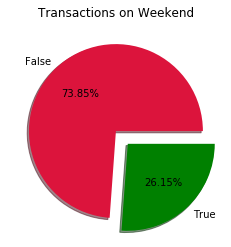

In [62]:
size=new_data_rev['Weekend'].value_counts().values
labels=new_data_rev['Weekend'].value_counts().index
colors = ['crimson', 'green']
explode = [0, 0.2]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%',)
plt.title('Transactions on Weekend')
plt.show()

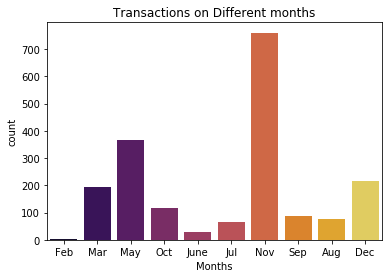

In [63]:
sns.countplot(new_data_rev['Month'],palette='inferno')
plt.title('Transactions on Different months')
plt.xlabel('Months')
plt.ylabel('count')
plt.show()

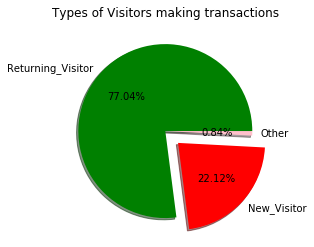

In [64]:
# Distribution of Visitors
size=new_data_rev['VisitorType'].value_counts().values
labels=new_data_rev['VisitorType'].value_counts().index
colors = ['green', 'red', 'pink']
explode = [0, 0.2, 0]
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Types of Visitors making transactions')
plt.show()

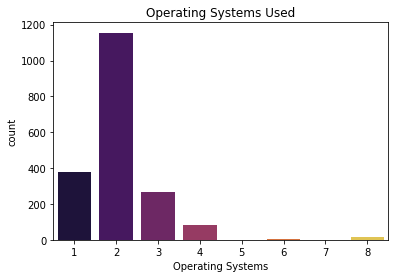

In [65]:
#Distribution of customers based on Operating Systems
sns.countplot(new_data_rev['OperatingSystems'],palette='inferno')
plt.title('Operating Systems Used')
plt.xlabel('Operating Systems')
plt.ylabel('count')
plt.show()

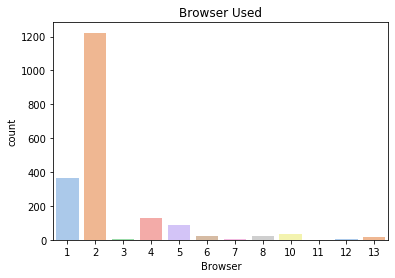

In [66]:
#Distribution of customers based on Browser
sns.countplot(new_data_rev['Browser'],palette='pastel')
plt.title('Browser Used')
plt.xlabel('Browser')
plt.ylabel('count')
plt.show()

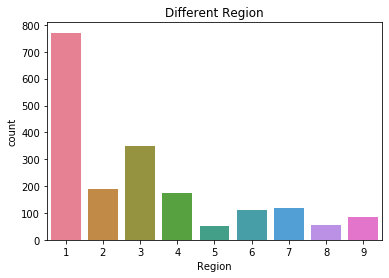

In [67]:
#Distribution of customers based on Region
sns.countplot(new_data_rev['Region'],palette='husl')
plt.title('Different Region')
plt.xlabel('Region')
plt.ylabel('count')
plt.show()

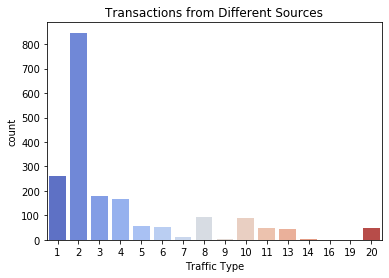

In [68]:
#Distribution of customers based on Traffic Type
sns.countplot(new_data_rev['TrafficType'],palette='coolwarm')
plt.title('Transactions from Different Sources')
plt.xlabel('Traffic Type')
plt.ylabel('count')
plt.show()

## Multi-collinearity

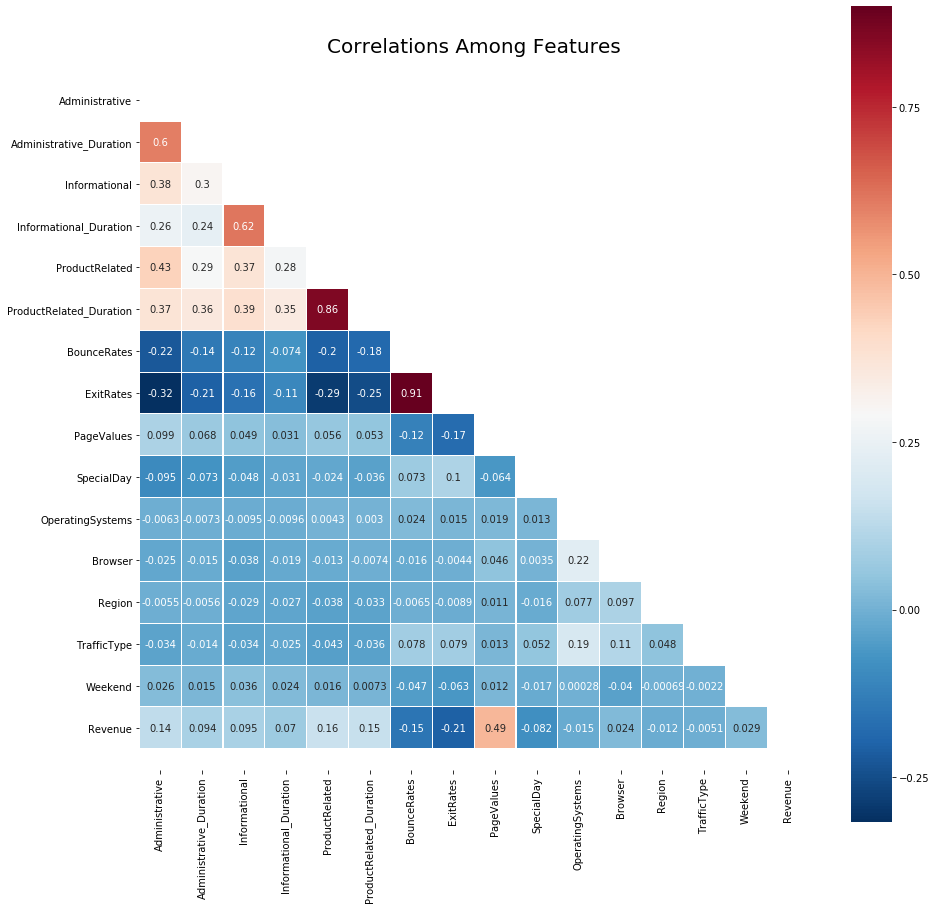

In [69]:
mask = np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig,ax= plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(data.corr(),
           annot=True,
           mask = mask,
           cmap = 'RdBu_r',
           linewidths=0.1,
           linecolor='white',
           vmax = .9,
           square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

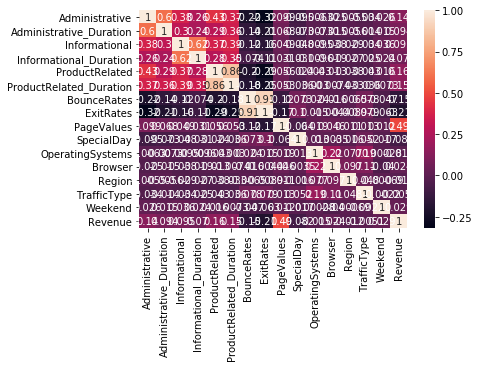

In [70]:
#plt.figure(figsize=(5,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

Revenue is not having much collinearity with any of the features. Only Page Values is having a correlation of 0.49

But as expected administrative and administrative duration,imformational and informational_duration,product realted and product_related duration is having multi-collinearity. Also bounce rates and exit rates is also having a multicollinearity

## Label Encoding

In [71]:
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [72]:
le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [73]:
le = LabelEncoder()
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

## Assumptions regarding Models

Our problem is classify the data based on transaction. Since this is a binary classifier, Logistic Regression can be used. We will compare the result with other models also

## Base Model

In [74]:
y=data['Revenue']
X=data.drop(['Revenue'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [75]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [76]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 88.3205363901806
Test Score : 87.15536814790788
Precision : 87.15536814790788
Recall : 87.15536814790788
F1 Score : 45.303867403314904
AUC Score : 65.40037336436293
Confusion matrix: 
[[2523   71]
 [ 325  164]]


Decision Tree
Train Score : 100.0
Test Score : 85.07946805060006
Precision : 85.07946805060006
Recall : 85.07946805060006
F1 Score : 53.15682281059063
AUC Score : 72.21525843026143
Confusion matrix: 
[[2362  232]
 [ 228  261]]


Random Forest
Train Score : 99.96755704552828
Test Score : 89.84755108660396
Precision : 89.84755108660396
Recall : 89.84755108660396
F1 Score : 62.78240190249703
AUC Score : 75.29764297978818
Confusion matrix: 
[[2506   88]
 [ 225  264]]


K Nearest Neighbors
Train Score : 89.71558343246458
Test Score : 85.40382744080442
Precision : 85.40382744080442
Recall : 85.40382744080442
F1 Score : 36.79775280898876
AUC Score : 61.62135997338517
Confusion matrix: 
[[2502   92]
 [ 358  131]]


Naive Bayes
Train Score : 85.0654266

## Feature Selection

Removing high multi-collinear variables like administrative,informational,BounceRates and product related

In [77]:
y=data['Revenue']
X=data.drop(['Revenue','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [78]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [79]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 88.25565048123715
Test Score : 87.12293220888745
Precision : 87.12293220888745
Recall : 87.12293220888745
F1 Score : 44.937586685159495
AUC Score : 65.21514963743607
Confusion matrix: 
[[2524   70]
 [ 327  162]]


Decision Tree
Train Score : 100.0
Test Score : 86.11741809925397
Precision : 86.11741809925397
Recall : 86.11741809925397
F1 Score : 58.03921568627452
AUC Score : 75.73616478486612
Confusion matrix: 
[[2359  235]
 [ 193  296]]


Random Forest
Train Score : 99.96755704552828
Test Score : 89.75024326954265
Precision : 89.75024326954265
Recall : 89.75024326954265
F1 Score : 63.51039260969977
AUC Score : 76.15253384797069
Confusion matrix: 
[[2492  102]
 [ 214  275]]


K Nearest Neighbors
Train Score : 89.83454093219423
Test Score : 85.8579305870905
Precision : 85.8579305870905
Recall : 85.8579305870905
F1 Score : 38.06818181818182
AUC Score : 62.14013619600367
Confusion matrix: 
[[2513   81]
 [ 355  134]]


Naive Bayes
Train Score : 87.401319346

## Statistical Significance

In [80]:
ct=pd.crosstab(data['Revenue'],data['Month'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Month :',p_value)

p-value of Month : 2.2387855164805443e-77


In [81]:
ct=pd.crosstab(data['Revenue'],data['OperatingSystems'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Operating Systems :',p_value)

p-value of Operating Systems : 1.4160941129614507e-13


In [82]:
ct=pd.crosstab(data['Revenue'],data['Browser'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Browser :',p_value)

p-value of Browser : 0.00608754317955108


In [83]:
ct=pd.crosstab(data['Revenue'],data['Region'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of Region :',p_value)

p-value of Region : 0.3214249979076556


In [84]:
ct=pd.crosstab(data['Revenue'],data['TrafficType'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of TrafficType :',p_value)

p-value of TrafficType : 1.652735258160153e-67


In [85]:
ct=pd.crosstab(data['Revenue'],data['VisitorType'])
chi_value,p_value,dof,ec=chi2_contingency(ct)
print('p-value of VisitorType :',p_value)

p-value of VisitorType : 4.269904152293867e-30


In [86]:
ct=pd.crosstab(data['Revenue'],data['Weekend'])
print(ct)

Weekend     0     1
Revenue            
0        8053  2369
1        1409   499


In [87]:
count=np.array([1409,499])
obs=np.array([9462,2868])
zstat,p_value=proportions_ztest(count,obs) 
print('p-value of Weekend :',p_value)

p-value of Weekend : 0.0011420423637110938


Features like Month,Operating Systems,Browser,TrafficType,VisitorType,Weekend are Significant among categorical variables

In [88]:
tstat,p_value=ttest_ind(new_data_rev['Administrative'],new_data_no_rev['Administrative'])
print('p-value of Administartive :',p_value)

p-value of Administartive : 3.5197598377784024e-54


In [89]:
tstat,p_value=ttest_ind(new_data_rev['Administrative_Duration'],new_data_no_rev['Administrative_Duration'])
print('p-value of Administartive_Duration :',p_value)

p-value of Administartive_Duration : 2.146513634744256e-25


In [90]:
tstat,p_value=ttest_ind(new_data_rev['Informational'],new_data_no_rev['Informational'])
print('p-value of Informational :',p_value)

p-value of Informational : 3.174034311262581e-26


In [91]:
tstat,p_value=ttest_ind(new_data_rev['Informational_Duration'],new_data_no_rev['Informational_Duration'])
print('p-value of Informational_Duration :',p_value)

p-value of Informational_Duration : 5.282870860721332e-15


In [92]:
tstat,p_value=ttest_ind(new_data_rev['ProductRelated'],new_data_no_rev['ProductRelated'])
print('p-value of ProductRelated :',p_value)

p-value of ProductRelated : 3.2411873289223995e-70


In [93]:
tstat,p_value=ttest_ind(new_data_rev['ProductRelated_Duration'],new_data_no_rev['ProductRelated_Duration'])
print('p-value of Informational_Duration :',p_value)

p-value of Informational_Duration : 6.115338253467455e-65


In [94]:
tstat,p_value=ttest_ind(new_data_rev['BounceRates'],new_data_no_rev['BounceRates'])
print('p-value of BounceRates :',p_value)

p-value of BounceRates : 1.594197538516729e-63


In [95]:
tstat,p_value=ttest_ind(new_data_rev['ExitRates'],new_data_no_rev['ExitRates'])
print('p-value of ExitRates :',p_value)

p-value of ExitRates : 1.662653625073615e-119


In [96]:
tstat,p_value=ttest_ind(new_data_rev['PageValues'],new_data_no_rev['PageValues'])
print('p-value of PageValues :',p_value)

p-value of PageValues : 0.0


In [97]:
tstat,p_value=ttest_ind(new_data_rev['SpecialDay'],new_data_no_rev['SpecialDay'])
print('p-value of SpecialDay :',p_value)

p-value of SpecialDay : 5.498934260229595e-20


Features like Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay are Significant among numerical variables

## Feature Selection

Removing 'Region' as it doesnot pass statistical test

In [98]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [100]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 88.56926570779711
Test Score : 87.47972753811223
Precision : 87.47972753811223
Recall : 87.47972753811223
F1 Score : 44.69914040114613
AUC Score : 64.92933196475113
Confusion matrix: 
[[2541   53]
 [ 333  156]]


Decision Tree
Train Score : 100.0
Test Score : 85.8579305870905
Precision : 85.8579305870905
Recall : 85.8579305870905
F1 Score : 56.74603174603175
AUC Score : 74.75222039849707
Confusion matrix: 
[[2361  233]
 [ 203  286]]


Random Forest
Train Score : 99.96755704552828
Test Score : 89.49075575737918
Precision : 89.49075575737918
Recall : 89.49075575737918
F1 Score : 62.844036697247695
AUC Score : 75.91535760517033
Confusion matrix: 
[[2485  109]
 [ 215  274]]


K Nearest Neighbors
Train Score : 89.76965502325078
Test Score : 85.76062277002919
Precision : 85.76062277002919
Recall : 85.76062277002919
F1 Score : 37.730496453900706
AUC Score : 61.999336206094604
Confusion matrix: 
[[2511   83]
 [ 356  133]]


Naive Bayes
Train Score : 87.4121336

## Scaling

In [101]:
sc=StandardScaler()
scaled_data=sc.fit_transform(data)

## Models after Scaling

In [102]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [103]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [104]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 88.79636638909916
Test Score : 87.7392150502757
Precision : 87.7392150502757
Recall : 87.7392150502757
F1 Score : 47.64542936288089
AUC Score : 66.41112178016596
Confusion matrix: 
[[2533   61]
 [ 317  172]]


Decision Tree
Train Score : 100.0
Test Score : 85.8579305870905
Precision : 85.8579305870905
Recall : 85.8579305870905
F1 Score : 56.66003976143141
AUC Score : 74.66924616032279
Confusion matrix: 
[[2362  232]
 [ 204  285]]


Random Forest
Train Score : 99.96755704552828
Test Score : 89.5231916963996
Precision : 89.5231916963996
Recall : 89.5231916963996
F1 Score : 63.001145475372276
AUC Score : 76.01760709392289
Confusion matrix: 
[[2485  109]
 [ 214  275]]


K Nearest Neighbors
Train Score : 90.89434411160376
Test Score : 87.09049626986702
Precision : 87.09049626986702
Recall : 87.09049626986702
F1 Score : 49.74747474747475
AUC Score : 68.09997272295828
Confusion matrix: 
[[2488  106]
 [ 292  197]]


Naive Bayes
Train Score : 86.49291662160701


## Imbalanced Dataset

Balanced dataset can be created by using SMOTE technique or any other resampling techniques. But if we apply this techniques to the dataset, the distribution of the dataset will change. So we will apply resampling techniques to the training dataset and keep the validation set as such

## Models-Oversampling(SMOTE)

In [105]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [107]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [108]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [109]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    

Logistic Regression
Train Score : 82.54982115482882
Test Score : 86.21472591631529
Precision : 86.21472591631529
Recall : 86.21472591631529
F1 Score : 62.75197195442595
AUC Score : 80.93839330340742
Confusion matrix: 
[[2300  294]
 [ 131  358]]


Decision Tree
Train Score : 100.0
Test Score : 83.97664612390528
Precision : 83.97664612390528
Recall : 83.97664612390528
F1 Score : 54.34380776340111
AUC Score : 74.29804977035255
Confusion matrix: 
[[2295  299]
 [ 195  294]]


Random Forest
Train Score : 99.98722534491569
Test Score : 88.74472915990917
Precision : 88.74472915990917
Recall : 88.74472915990917
F1 Score : 68.13590449954086
AUC Score : 83.52052794477738
Confusion matrix: 
[[2365  229]
 [ 118  371]]


K Nearest Neighbors
Train Score : 92.9292284108329
Test Score : 81.05741161206616
Precision : 81.05741161206616
Recall : 81.05741161206616
F1 Score : 53.87045813586098
AUC Score : 76.4630664125014
Confusion matrix: 
[[2158  436]
 [ 148  341]]


Naive Bayes
Train Score : 76.437148696

## Models-Under Sampling

In [110]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
10385,154.0,248.166667,886.479167,0.005128,77.801588,0.0,1,2,2,2,0,0,1
8823,0.0,0.000000,53.625000,0.050000,0.000000,0.0,7,3,2,11,2,0,0
5298,0.0,0.000000,121.000000,0.050000,0.000000,0.0,6,3,2,3,2,0,0
10187,0.0,21.000000,190.708333,0.039259,0.000000,0.0,7,3,2,13,2,1,0
11018,0.0,0.000000,146.500000,0.018182,0.000000,0.0,7,1,1,2,0,0,0


In [112]:
no_tra = X[X.Revenue==0]
tra = X[X.Revenue==1]
print(len(tra))
print(len(no_tra))

1419
7828


In [113]:
no_tra_downsampled = resample(no_tra,
                                replace = False,
                                n_samples = len(tra),
                                random_state = 27)

In [114]:
downsampled = pd.concat([no_tra_downsampled,tra])

In [115]:
downsampled.Revenue.value_counts()

1    1419
0    1419
Name: Revenue, dtype: int64

In [116]:
y_train = downsampled.Revenue
X_train = downsampled.drop('Revenue', axis=1)

In [117]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [118]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [119]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    

Logistic Regression
Train Score : 81.92389006342495
Test Score : 87.09049626986702
Precision : 87.09049626986702
Recall : 87.09049626986702
F1 Score : 64.52762923351158
AUC Score : 81.79072202171757
Confusion matrix: 
[[2323  271]
 [ 127  362]]


Decision Tree
Train Score : 100.0
Test Score : 79.63023029516705
Precision : 79.63023029516705
Recall : 79.63023029516705
F1 Score : 55.46099290780142
AUC Score : 79.763667295773
Confusion matrix: 
[[2064  530]
 [  98  391]]


Random Forest
Train Score : 100.0
Test Score : 85.1119039896205
Precision : 85.1119039896205
Recall : 85.1119039896205
F1 Score : 64.05638214565388
AUC Score : 84.51472093063592
Confusion matrix: 
[[2215  379]
 [  80  409]]


K Nearest Neighbors
Train Score : 82.91050035236081
Test Score : 76.90561141745053
Precision : 76.90561141745053
Recall : 76.90561141745053
F1 Score : 47.800586510263926
AUC Score : 72.75122076586995
Confusion matrix: 
[[2045  549]
 [ 163  326]]


Naive Bayes
Train Score : 76.35658914728683
Test Sco

## Outliers Treatment-Median Imputation

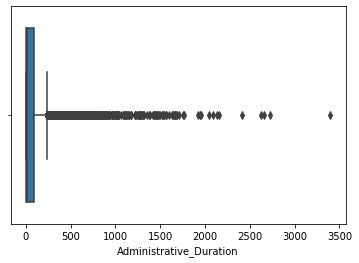

In [120]:
sns.boxplot(data['Administrative_Duration'])

In [121]:
q1=data['Administrative_Duration'].quantile(0.25)
q3=data['Administrative_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)


In [122]:
median=data.loc[data['Administrative_Duration']<high,'Administrative_Duration'].median()
data.loc[data.Administrative_Duration > high, 'Administrative_Duration'] = np.nan
data.fillna(median,inplace=True)

In [123]:
# data['Administrative_Duration'].replace(data['Administrative_Duration']>high,
#                                         data['Administrative_Duration'].median(),inplace=True)

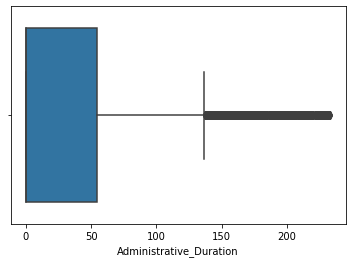

In [124]:
sns.boxplot(data['Administrative_Duration'])

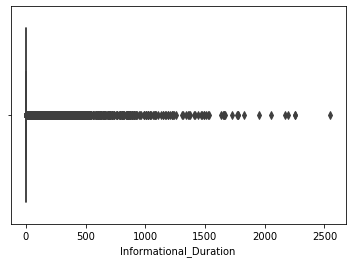

In [125]:
sns.boxplot(data['Informational_Duration'])

In [126]:
q1=data['Informational_Duration'].quantile(0.25)
q3=data['Informational_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)


In [127]:
median=data.loc[data['Informational_Duration']<high,'Informational_Duration'].median()
data.loc[data.Informational_Duration > high, 'Informational_Duration'] = np.nan
data.fillna(median,inplace=True)

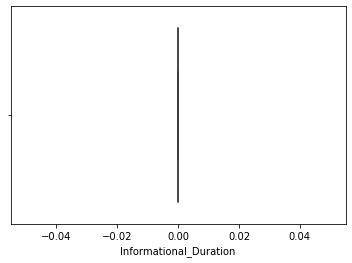

In [128]:
sns.boxplot(data['Informational_Duration'])

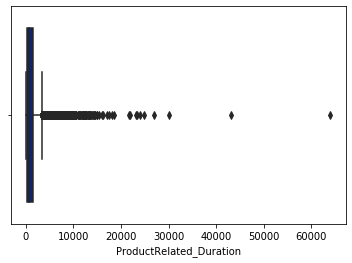

In [129]:
sns.boxplot(data['ProductRelated_Duration'],palette='dark')

In [130]:
q1=data['ProductRelated_Duration'].quantile(0.25)
q3=data['ProductRelated_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)


In [131]:
median=data.loc[data['ProductRelated_Duration']<high,'ProductRelated_Duration'].median()
data.loc[data.ProductRelated_Duration > high, 'ProductRelated_Duration'] = np.nan
data.fillna(median,inplace=True)

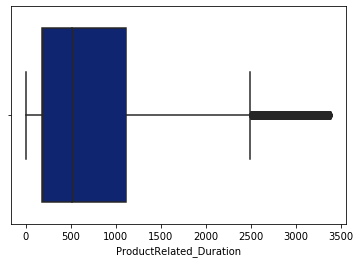

In [132]:
sns.boxplot(data['ProductRelated_Duration'],palette='dark')

## Model Building-After outlier treatment (Median imputation)

In [134]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [135]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 81.96218702095044
Test Score : 85.76062277002919
Precision : 85.76062277002919
Recall : 85.76062277002919
F1 Score : 60.977777777777774
AUC Score : 79.42392622269733
Confusion matrix: 
[[2301  293]
 [ 146  343]]


Decision Tree
Train Score : 100.0
Test Score : 84.72267272137528
Precision : 84.72267272137528
Recall : 84.72267272137528
F1 Score : 55.69143932267168
AUC Score : 74.90732901000105
Confusion matrix: 
[[2316  278]
 [ 193  296]]


Random Forest
Train Score : 99.98083801737353
Test Score : 88.87447291599092
Precision : 88.87447291599092
Recall : 88.87447291599092
F1 Score : 67.67200754005654
AUC Score : 82.60193808899882
Confusion matrix: 
[[2381  213]
 [ 130  359]]


K Nearest Neighbors
Train Score : 92.57153806847215
Test Score : 79.24099902692183
Precision : 79.24099902692183
Recall : 79.24099902692183
F1 Score : 51.58850226928896
AUC Score : 75.38365238011897
Confusion matrix: 
[[2102  492]
 [ 148  341]]


Naive Bayes
Train Score : 74.929739

# Models-Undersampled(Median Imputation)

In [136]:
y=data['Revenue']
X=data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [137]:
X = pd.concat([X_train, y_train], axis=1)
X.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,TrafficType,VisitorType,Weekend,Revenue
10385,154.0,516.478571,886.479167,0.005128,77.801588,0.0,1,2,2,2,0,0,1
8823,0.0,0.000000,53.625000,0.050000,0.000000,0.0,7,3,2,11,2,0,0
5298,0.0,0.000000,121.000000,0.050000,0.000000,0.0,6,3,2,3,2,0,0
10187,0.0,516.478571,190.708333,0.039259,0.000000,0.0,7,3,2,13,2,1,0
11018,0.0,0.000000,146.500000,0.018182,0.000000,0.0,7,1,1,2,0,0,0


In [138]:
no_tra = X[X.Revenue==0]
tra = X[X.Revenue==1]
print(len(tra))
print(len(no_tra))

1419
7828


In [139]:
no_tra_downsampled = resample(no_tra,
                                replace = False,
                                n_samples = len(tra),
                                random_state = 27)

In [140]:
downsampled = pd.concat([no_tra_downsampled,tra])

In [141]:
downsampled.Revenue.value_counts()

1    1419
0    1419
Name: Revenue, dtype: int64

In [142]:
y_train = downsampled.Revenue
X_train = downsampled.drop('Revenue', axis=1)

In [143]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [144]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

In [145]:
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    

Logistic Regression
Train Score : 81.64200140944327
Test Score : 86.47421342847875
Precision : 86.47421342847875
Recall : 86.47421342847875
F1 Score : 62.26244343891402
AUC Score : 79.9309559735933
Confusion matrix: 
[[2322  272]
 [ 145  344]]


Decision Tree
Train Score : 100.0
Test Score : 78.85176775867662
Precision : 78.85176775867662
Recall : 78.85176775867662
F1 Score : 53.75886524822696
AUC Score : 78.30537042380324
Confusion matrix: 
[[2052  542]
 [ 110  379]]


Random Forest
Train Score : 100.0
Test Score : 85.43626337982485
Precision : 85.43626337982485
Recall : 85.43626337982485
F1 Score : 65.05836575875486
AUC Score : 85.45424157998717
Confusion matrix: 
[[2216  378]
 [  71  418]]


K Nearest Neighbors
Train Score : 81.67723749119098
Test Score : 74.50535192993837
Precision : 74.50535192993837
Recall : 74.50535192993837
F1 Score : 46.09053497942387
AUC Score : 72.15459460482188
Confusion matrix: 
[[1961  633]
 [ 153  336]]


Naive Bayes
Train Score : 75.22903453136011
Test 

## Outliers Treatment-KNN Imputer

In [146]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [147]:
le = LabelEncoder()
data['Revenue'] = le.fit_transform(data['Revenue'])
data['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [148]:
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['Month'].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

In [149]:
le = LabelEncoder()
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['VisitorType'].value_counts()

2    10551
0     1694
1       85
Name: VisitorType, dtype: int64

In [150]:
le = LabelEncoder()
data['Weekend'] = le.fit_transform(data['Weekend'])
data['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [151]:
q1=data['Administrative_Duration'].quantile(0.25)
q3=data['Administrative_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)

In [152]:
data.loc[data.Administrative_Duration > high, 'Administrative_Duration'] = np.nan

In [153]:
q1=data['Informational_Duration'].quantile(0.25)
q3=data['Informational_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)

In [154]:
data.loc[data.Informational_Duration > high, 'Informational_Duration'] = np.nan

In [155]:
q1=data['ProductRelated_Duration'].quantile(0.25)
q3=data['ProductRelated_Duration'].quantile(0.75)
iqr=q3-q1
high=q3+(1.5*iqr)

In [156]:
data.loc[data.ProductRelated_Duration > high, 'ProductRelated_Duration'] = np.nan

In [157]:
imput=KNNImputer(n_neighbors=3)
data_ar=imput.fit_transform(data)

In [158]:
col=['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 
     'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 
     'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
new_data=pd.DataFrame(data_ar,columns=col)

In [159]:
new_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,0.0


In [160]:
new_data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [162]:
y=new_data['Revenue']
X=new_data.drop(['Revenue','Region','Administrative','Informational','ProductRelated','BounceRates'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

sm=SMOTE(random_state=42)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [163]:
models = {'Logistic Regression':LogisticRegression(random_state=0),
        'Decision Tree':DecisionTreeClassifier(random_state=0),
        'Random Forest':RandomForestClassifier(n_estimators=50,random_state=0),
        'K Nearest Neighbors':KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes':GaussianNB()
        }

for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Train Score :',model.score(X_train, y_train)*100)
    print('Test Score :',accuracy_score(y_test, y_pred)*100)
    print('Precision :',precision_score(y_test,y_pred,average='micro')*100)
    print('Recall :',recall_score(y_test,y_pred,average='micro')*100)
    print('F1 Score :',f1_score(y_test,y_pred)*100)
    print('AUC Score :',roc_auc_score(y_test,y_pred)*100)
    print('Confusion matrix: ')
    print(confusion_matrix(y_test,y_pred))
    print('\n')

Logistic Regression
Train Score : 83.06719468574349
Test Score : 84.8199805384366
Precision : 84.8199805384366
Recall : 84.8199805384366
F1 Score : 61.63934426229508
AUC Score : 81.60309381567971
Confusion matrix: 
[[2239  355]
 [ 113  376]]


Decision Tree
Train Score : 100.0
Test Score : 85.76062277002919
Precision : 85.76062277002919
Recall : 85.76062277002919
F1 Score : 60.12715712988192
AUC Score : 78.42823536460574
Confusion matrix: 
[[2313  281]
 [ 158  331]]


Random Forest
Train Score : 99.98722534491569
Test Score : 89.16639636717483
Precision : 89.16639636717483
Recall : 89.16639636717483
F1 Score : 68.72659176029963
AUC Score : 83.43920924959754
Confusion matrix: 
[[2382  212]
 [ 122  367]]


K Nearest Neighbors
Train Score : 92.973939703628
Test Score : 80.0518975024327
Precision : 80.0518975024327
Recall : 80.0518975024327
F1 Score : 52.28859581070597
AUC Score : 75.53363669187821
Confusion matrix: 
[[2131  463]
 [ 152  337]]


Naive Bayes
Train Score : 75.01916198262647
